In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)

In [6]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [7]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

###  Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [10]:
tickers=['BAC','C','GS','JPM','MS','WFC']

### Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on

In [11]:
bank_stocks=pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [12]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

### Check the head of the bank_stocks dataframe.

In [13]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.631054  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.656166  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.756695  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.794384  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.183868  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

### What is the max Close price for each bank's stock throughout the time period?

In [16]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by



In [17]:
returns=pd.DataFrame()

### We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [31]:
for tick in tickers:
    returns[tick+' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [32]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


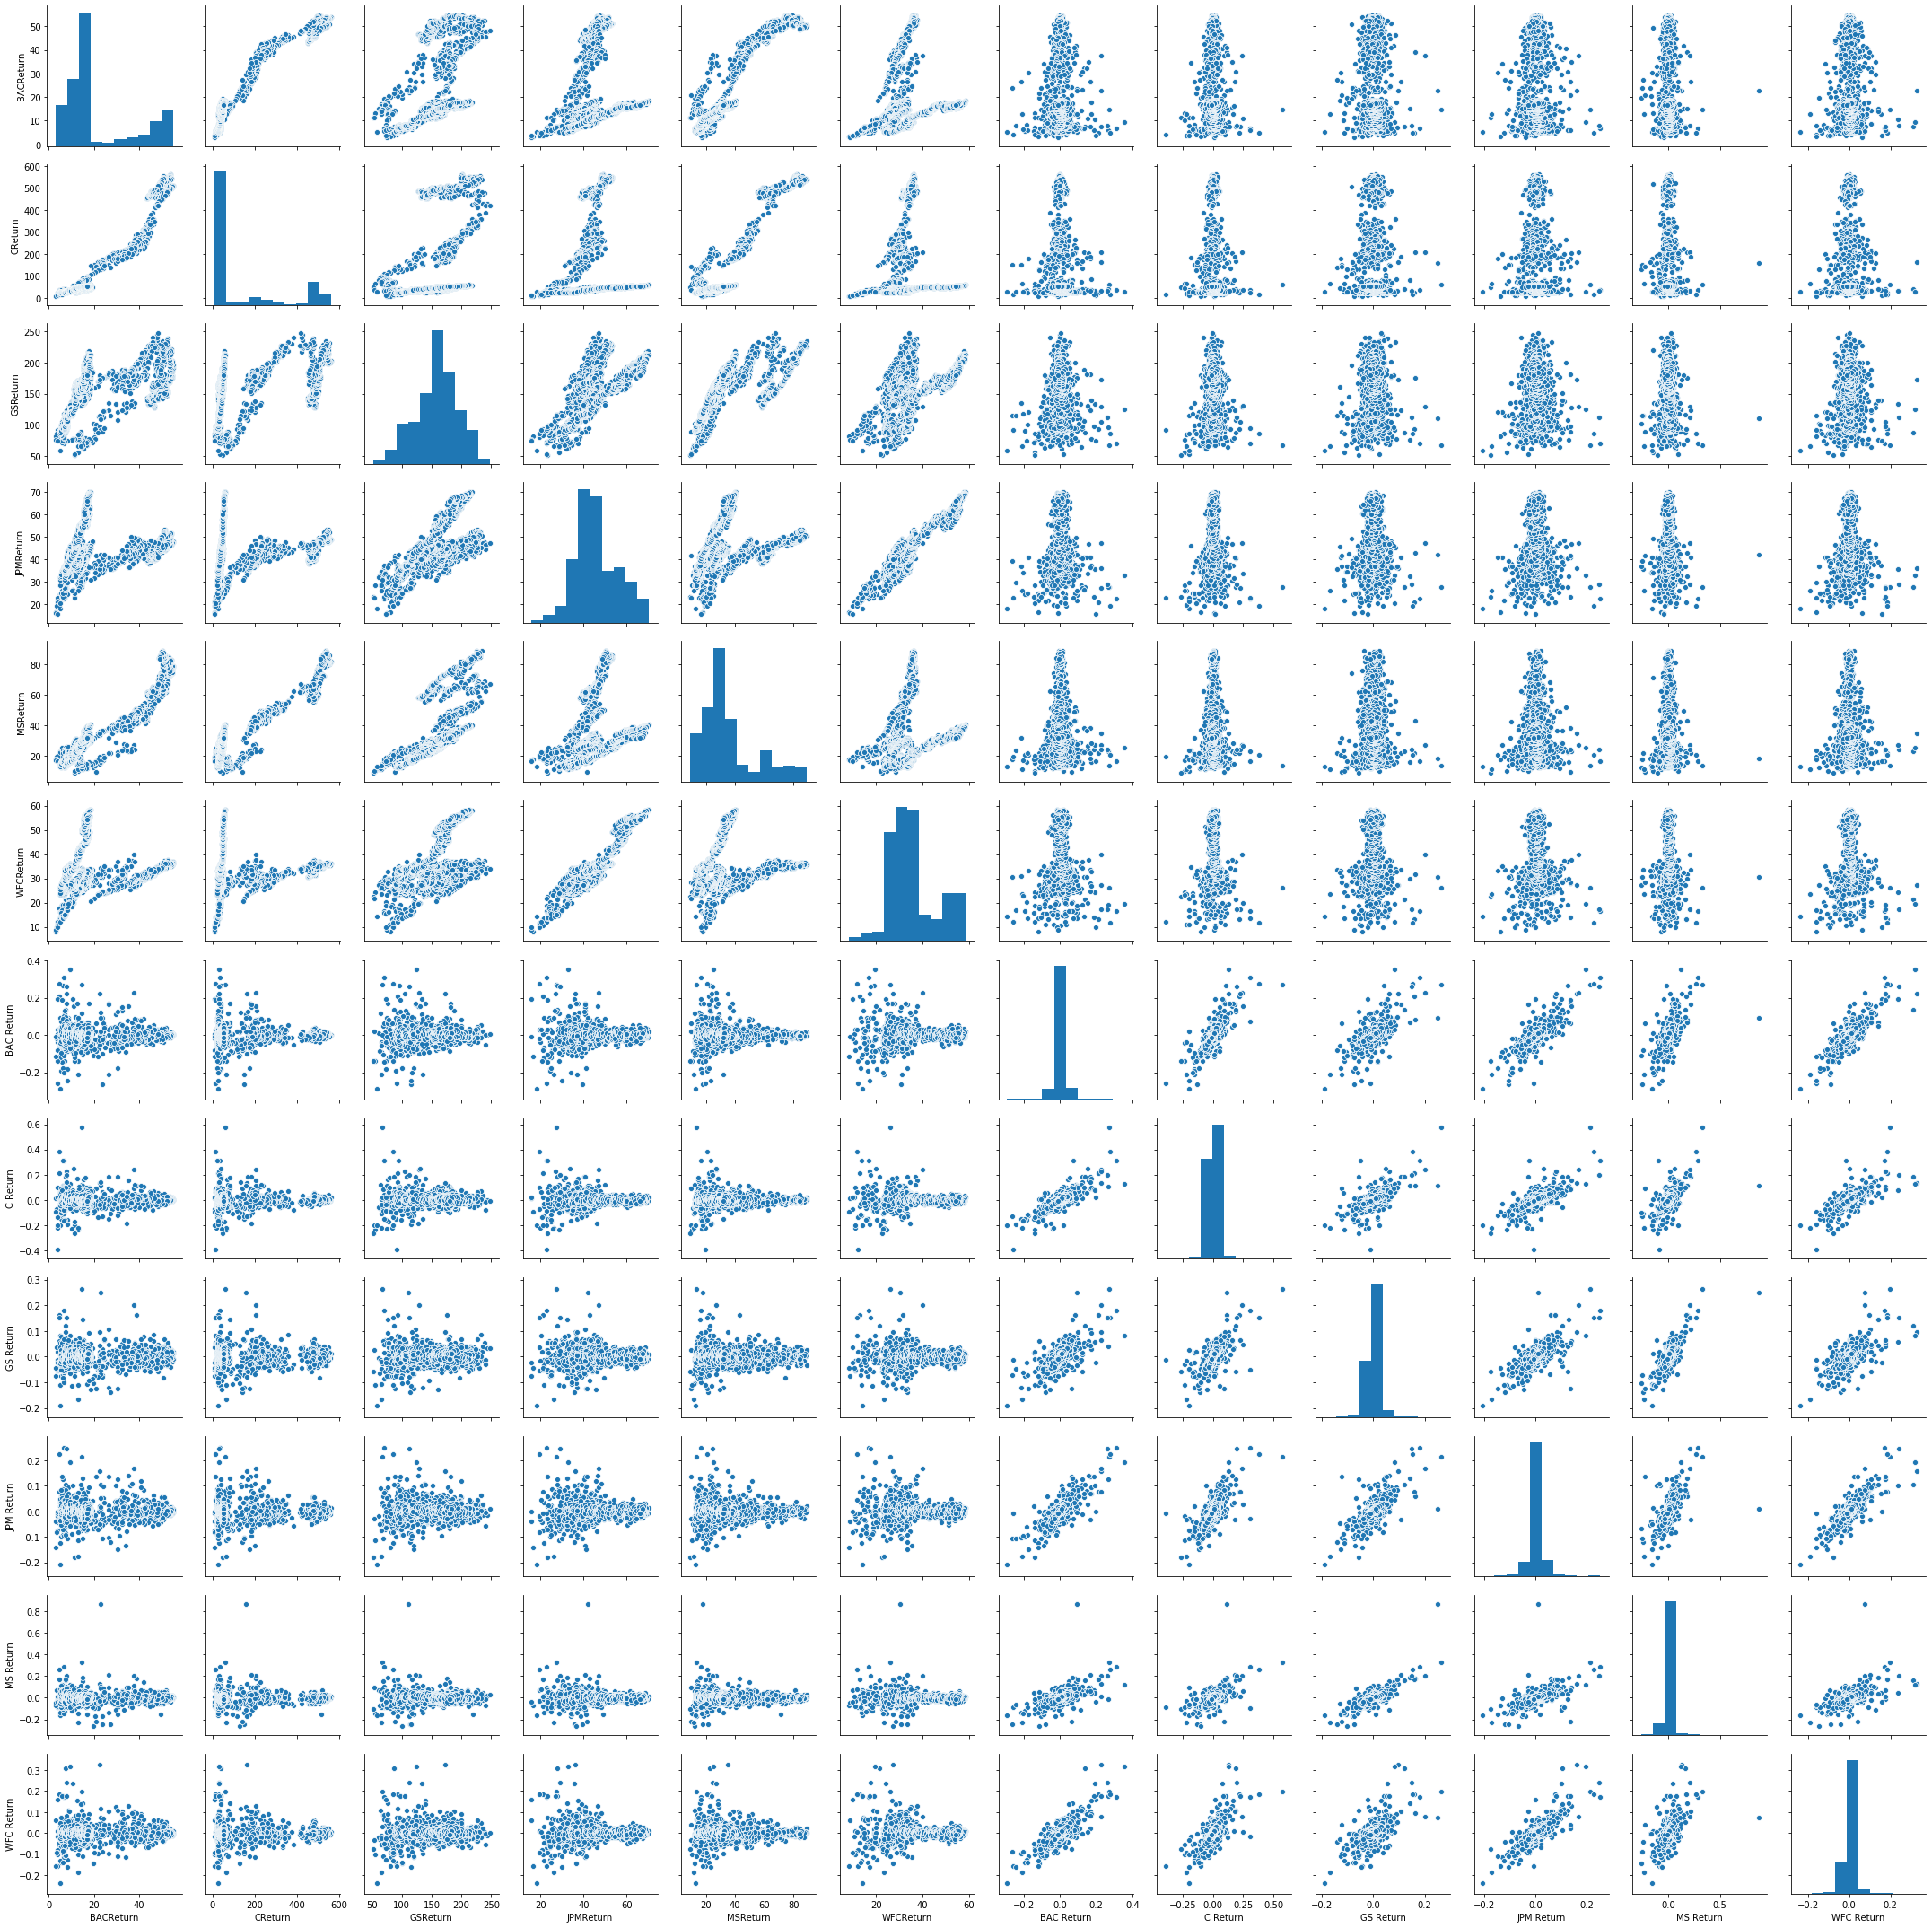

In [35]:
import seaborn as sns
sns.pairplot(returns[1:])

In [36]:
returns.idxmin()

BACReturn    2009-03-06
CReturn      2009-03-05
GSReturn     2008-11-20
JPMReturn    2009-03-09
MSReturn     2008-11-20
WFCReturn    2009-03-05
BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [37]:
returns.idxmax()

BACReturn    2006-11-16
CReturn      2006-12-27
GSReturn     2007-10-31
JPMReturn    2015-07-22
MSReturn     2007-06-14
WFCReturn    2015-07-22
BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

### Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [38]:
returns.std()

BACReturn      15.304887
CReturn       177.398413
GSReturn       35.635574
JPMReturn       9.839554
MSReturn       18.669383
WFCReturn      10.012564
BAC Return      0.036647
C Return        0.038672
GS Return       0.025390
JPM Return      0.027667
MS Return       0.037819
WFC Return      0.030238
dtype: float64

In [43]:
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn      0.828268
CReturn        2.721360
GSReturn      11.230525
JPMReturn      3.680196
MSReturn       2.479580
WFCReturn      1.901856
BAC Return     0.016163
C Return       0.015289
GS Return      0.014046
JPM Return     0.014017
MS Return      0.016249
WFC Return     0.012591
dtype: float64

###  Create a distplot using seaborn of the 2015 returns for Morgan Stanley 

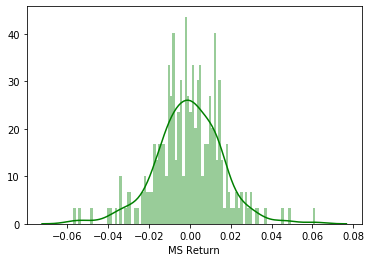

In [46]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=100,color='green')

### Create a distplot using seaborn of the 2008 returns for CitiGroup

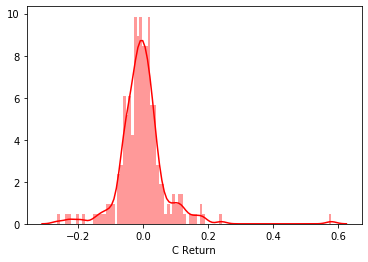

In [47]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100,color='red')

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

### Create a line plot showing Close price for each bank for the entire index of time

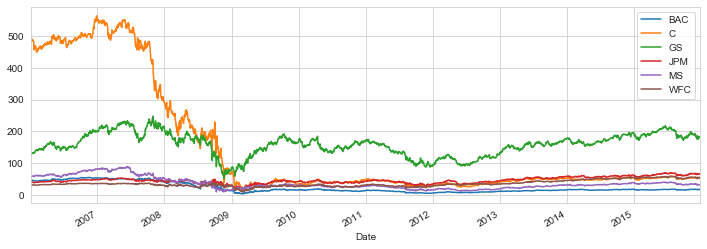

In [50]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

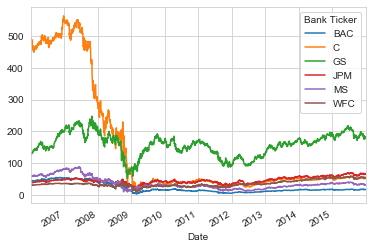

In [51]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [52]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

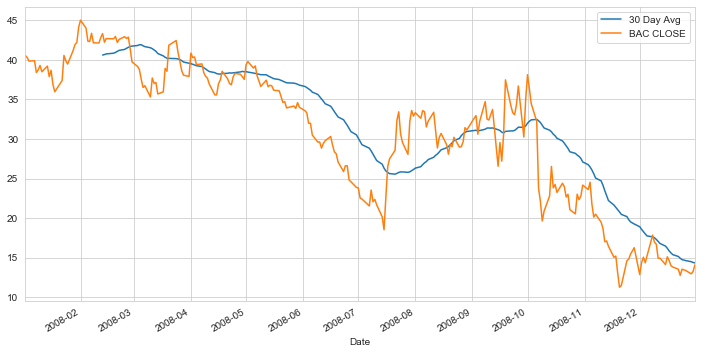

In [54]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

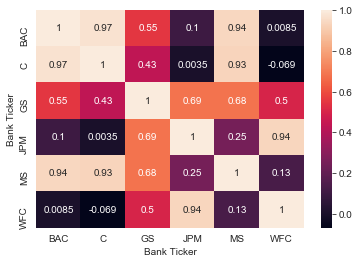

In [55]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

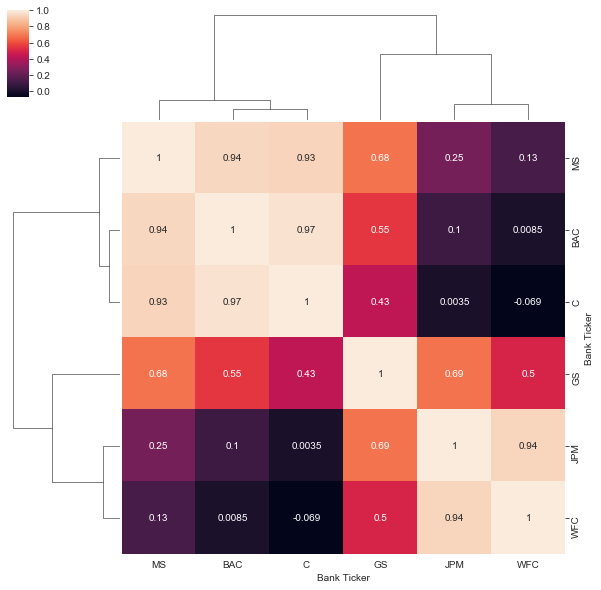

In [56]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [57]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [58]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [59]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [60]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')